# Juan Manuel Deutsch, Cesar Felipe Giraldo, Julian Felipe Pulido

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Exercise 2.1

In [16]:
## unit-tests for getStats and getEigen
import warnings
dfIrisTest = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")
AIris = dfIrisTest.values[:,0:4].astype(float)
def testStats(expected, A):
    def getStats(A):
        #Media
        mu = list(sum(row)/len(row) for row in zip(*A))

        #Covarianza
        n = A.shape[0]
        cov_mu = A - mu
        cov = np.dot(cov_mu.T, cov_mu) / (n)
        #Shape devuelve la cantidad de datos que se tiene un array
        
        #Correlación
        desv = np.sqrt(np.diag(cov))
        cor = cov / np.outer(desv, desv)

        return mu, cov, cor
    out = getStats(A)
    if type(out) != tuple or len(out) != 3:
        warnings.warn("getStats not working properly! Output of getStats should be a tuple of length 3!")
        return
    mu, cov, cor = out
    print("mu:", "OK" if np.array_equal(np.round(expected[0], 3), np.round(mu, 3)) else "FAIL")
    print("cov:", "OK" if np.array_equal(np.round(expected[1], 3), np.round(cov, 3)) else "FAIL")
    print("cor:", "OK" if np.array_equal(np.round(expected[2], 3), np.round(cor, 3)) else "FAIL")

covIris = np.array([[ 0.681, -0.039, 1.265, 0.513], [-0.039, 0.187, -0.32, -0.117], [1.265, -0.32, 3.092, 1.288], [0.513, -0.117,  1.288,  0.579]])
testStats(([5.843, 3.054, 3.759, 1.199], covIris, np.array([[ 1., -0.109, 0.872, 0.818], [-0.109,  1., -0.421, -0.357], [0.872, -0.421, 1., 0.963], [0.818, -0.357, 0.963,  1.]])), AIris)

mu: OK
cov: OK
cor: OK


# Exercise 2.2

Con relación a la pendiente respecto al origen, se tiene en cuenta el desplazamiento horizontal y vertical del vector bidimensional, y con los valores del desplazamiento del vector se realiza una proporción que da como resultado la pendiente.

Con relación a la pendiente respecto a un punto definido, es el mismo procedimiento que la pendiente desde el origen, pero toma en cuenta la diferencia entre coordenadas (coordenada más alta - coordenada más pequeña) en cada uno de los ejes.

Siendo la ecuación la siguiente:
$$pendiente = desplazamientoVertical (y) / desplazamientoHorizontal (x)$$

# Exercise 2.3

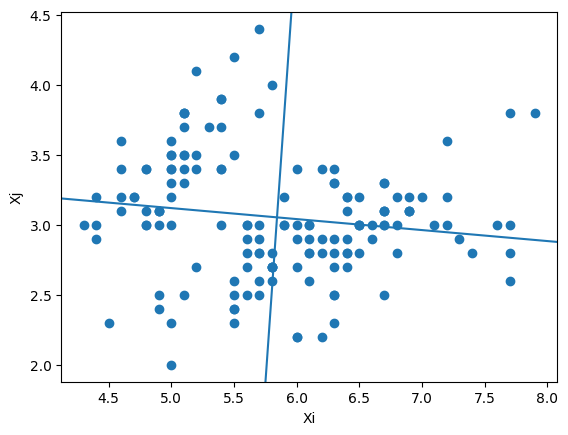

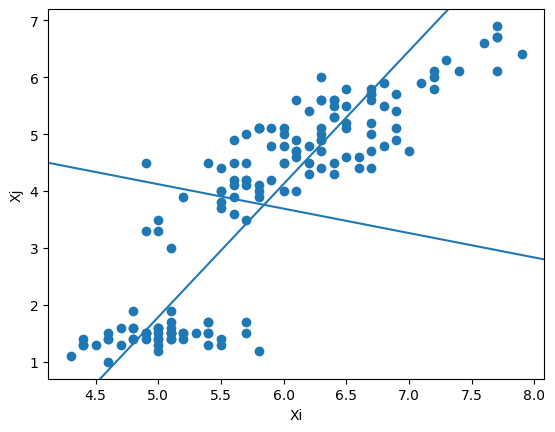

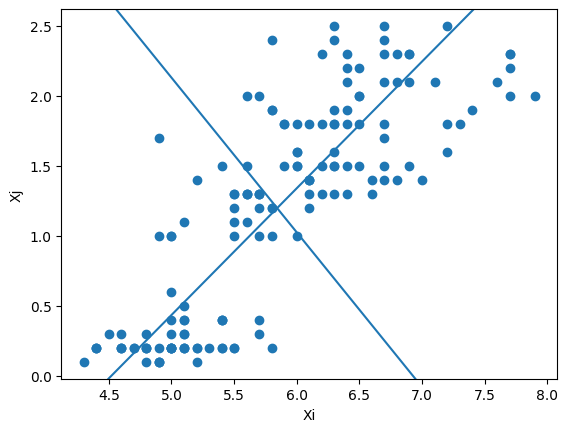

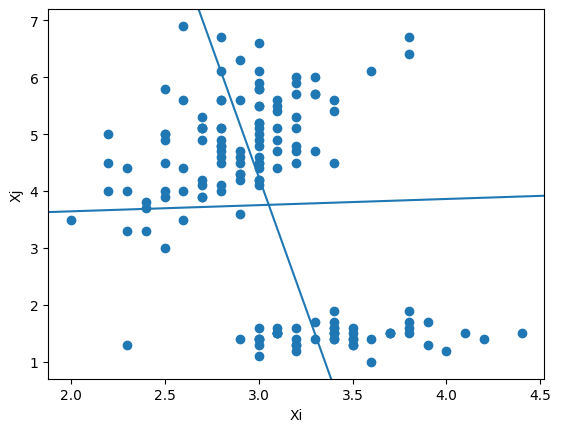

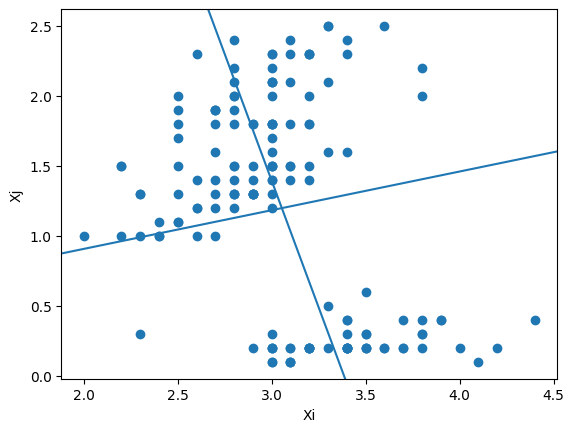

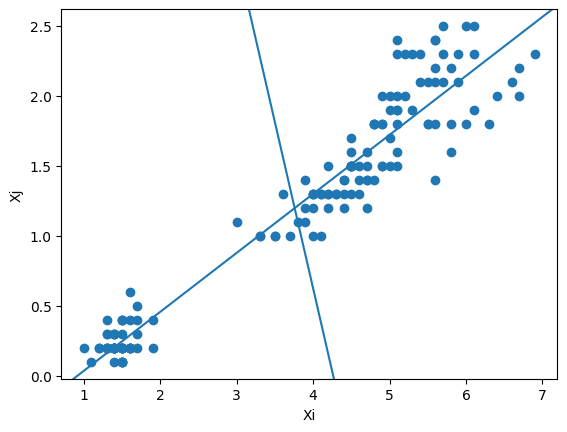

In [72]:
import matplotlib.pyplot as plt
import itertools
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')
# Esto es solo para preparar los datos con Iris, pero la función puede recibir cualquier conjunto de datos
D = (data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values)

def drawPrincipalDirections(D):

    combColumns = list(itertools.combinations(range(D.shape[1]), 2))

    for combination in combColumns:
        
        Xi, Xj = combination
        

        dataXij = D[:, [Xi, Xj]]
        
        mu = list(sum(row)/len(row) for row in zip(*dataXij))
        n = dataXij.shape[0]
        cov_mu = dataXij - mu
        cov = np.dot(cov_mu.T, cov_mu) / (n)
        
        eigenvalues, eigenvectors = np.linalg.eig(cov)

        #Arreglar el Xi ya que creo que los datos deben estar solo con min y maximo del Xi
        data_range = np.ptp(dataXij, axis=0)

        plt.scatter(dataXij[:, 0], dataXij[:, 1])

        for i in range(2):
            plt.axline((mu[0], mu[1]), slope=eigenvectors[1, i] / eigenvectors[0, i] )
            
        plt.xlabel(f'Xi')
        plt.ylabel(f'Xj')
        plt.show()
drawPrincipalDirections(D)
        

## Interpretación:
Podemos observar cómo se distribuyen los datos, pero más importante es entender su comportamiento. Podemos identificar patrones donde nuestras líneas tienen una pendiente mucho más pronunciada en algunos casos, y la dispersión de datos respecto a estas líneas varía en cada diagrama. 